In [ ]:
import pandas as pd
import io

df = pd.read_csv('./filtered_data/비상소화장치.csv')

# 2. '구' 이름 추출하기
# 로직: 하이픈('-')을 기준으로 문자열을 나누고, 그 중 첫 번째 요소([0])를 가져옵니다.
df['자치구'] = df['비상소화장치고유번호'].str.split('-').str[0]

# 3. 구별 개수 집계하기
gu_counts = df['자치구'].value_counts().reset_index()
gu_counts.columns = ['자치구', '설치개수']

# 4. 결과 출력
print("--- 자치구별 비상소화장치 설치 현황 ---")
print(gu_counts)

# (선택 사항) CSV로 결과 저장
# gu_counts.to_csv("구별_비상소화장치_집계.csv", index=False, encoding='utf-8-sig')

--- 자치구별 비상소화장치 설치 현황 ---
    자치구  설치개수
0    종로   266
1    중부   217
2    성북   215
3    동작   175
4    관악   167
5    용산   139
6   서대문   138
7    마포   110
8    강북   100
9   동대문    97
10   중랑    94
11   은평    88
12   강동    82
13  영등포    82
14   성동    77
15   구로    69
16   강남    67
17   광진    65
18   도봉    62
19   서초    59
20   양천    56
21   강서    52
22   노원    50
23   송파    34
24   금천    33


<Axes: >

C:\Users\User\AppData\Roaming\Python\Python312\site-packages\IPython\core\events.py:82: UserWarning: Glyph 49444 (\N{HANGUL SYLLABLE SEOL}) missing from current font.
  func(*args, **kwargs)
C:\Users\User\AppData\Roaming\Python\Python312\site-packages\IPython\core\events.py:82: UserWarning: Glyph 52824 (\N{HANGUL SYLLABLE CI}) missing from current font.
  func(*args, **kwargs)
C:\Users\User\AppData\Roaming\Python\Python312\site-packages\IPython\core\events.py:82: UserWarning: Glyph 44060 (\N{HANGUL SYLLABLE GAE}) missing from current font.
  func(*args, **kwargs)
C:\Users\User\AppData\Roaming\Python\Python312\site-packages\IPython\core\events.py:82: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  func(*args, **kwargs)
C:\Users\User\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 49444 (\N{HANGUL SYLLABLE SEOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\User\AppData\Roami

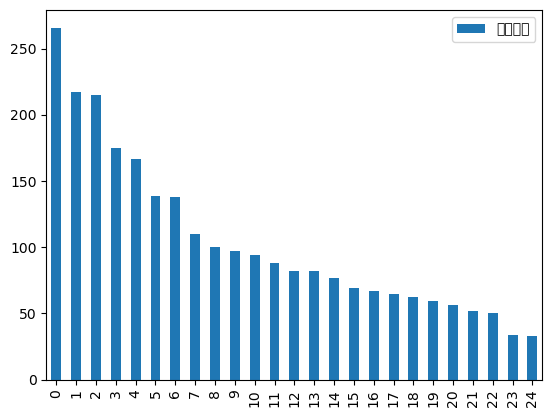

In [ ]:
gu_counts.plot.bar()

C:\Users\User\AppData\Local\Temp\ipykernel_30724\434908368.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


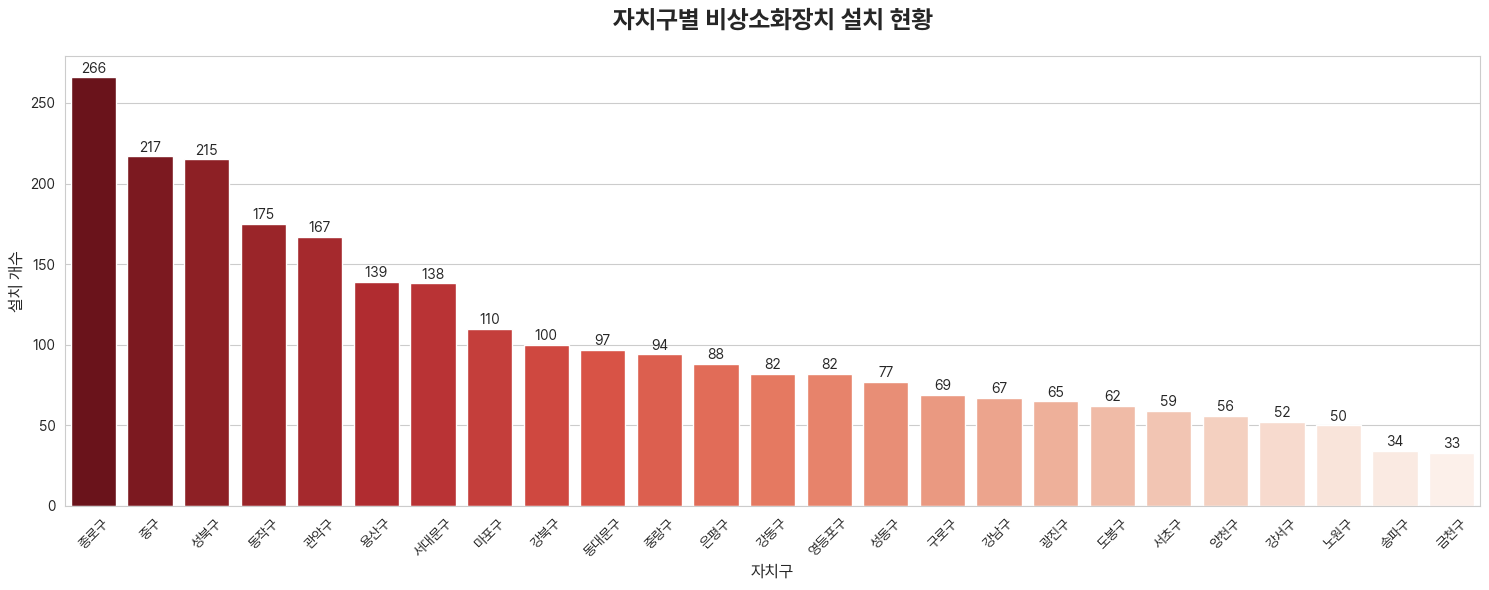

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ---------------------------------------------------------
# 1. 데이터 준비 (작성해주신 코드)
# ---------------------------------------------------------
# 실제 파일 경로에 맞게 수정해주세요.
df = pd.read_csv('./filtered_data/비상소화장치.csv')

# '구' 이름 추출 및 집계
df['자치구'] = df['비상소화장치고유번호'].str.split('-').str[0]
# (2) [요청사항 반영] 이름 표준화 함수 정의
def standardize_gu(name):
    # 예외 처리: '중부'는 '중구'로 변경
    if name == '중부':
        return '중구'
    
    # 이미 '구'로 끝나는 경우 그대로 반환 (예: 혹시 원본에 '강남구'로 되어있는 경우 대비)
    if name.endswith('구'):
        return name
    
    # 나머지는 뒤에 '구' 붙이기 (강남 -> 강남구)
    return name + '구'

# (3) 표준화 적용
df['자치구'] = df['자치구'].apply(standardize_gu)

# (4) 구별 개수 집계
gu_counts = df['자치구'].value_counts().reset_index()
gu_counts.columns = ['자치구', '설치개수']
# ---------------------------------------------------------
# 2. Seaborn 시각화 설정
# ---------------------------------------------------------

sns.set_style("whitegrid") 

# [중요] 한글 폰트 설정 (이 부분이 없으면 한글이 깨집니다)
plt.rcParams['font.family'] = 'Pretendard'
plt.rcParams['axes.unicode_minus'] = False
plt.figure(figsize=(15, 6))
 
# 스타일 설정 (seaborn 기본 테마 적용)

# ---------------------------------------------------------
# 3. 막대 그래프 그리기 (barplot)
# ---------------------------------------------------------
# palette='Reds_r': 붉은색 그라데이션 (데이터가 많을수록 진하게)
ax = sns.barplot(
    data=gu_counts, 
    x='자치구', 
    y='설치개수', 
    palette='Reds_r' 
)

# ---------------------------------------------------------
# 4. 그래프 꾸미기 (값 표시 및 라벨)
# ---------------------------------------------------------
# 제목 및 축 라벨 설정
plt.title('자치구별 비상소화장치 설치 현황', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('자치구', fontsize=12)
plt.ylabel('설치 개수', fontsize=12)

# X축 라벨 회전 (구 이름이 겹치지 않게)
plt.xticks(rotation=45)

# 막대 위에 구체적인 숫자(건수) 표시하기
for p in ax.patches:
    # 각 막대의 높이(height)를 가져옴
    height = p.get_height()
    # 텍스트 추가 (위치: 막대 중앙, 높이 위쪽)
    ax.text(
        p.get_x() + p.get_width() / 2., 
        height + 1,      # 막대보다 약간 위에 표시
        f'{int(height)}', # 정수형으로 표시
        ha='center', 
        va='bottom', 
        fontsize=10
    )

# 여백 조정 및 출력
plt.tight_layout()
plt.savefig('./results/구별_비상소화시설.png')
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_30724\1878776675.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


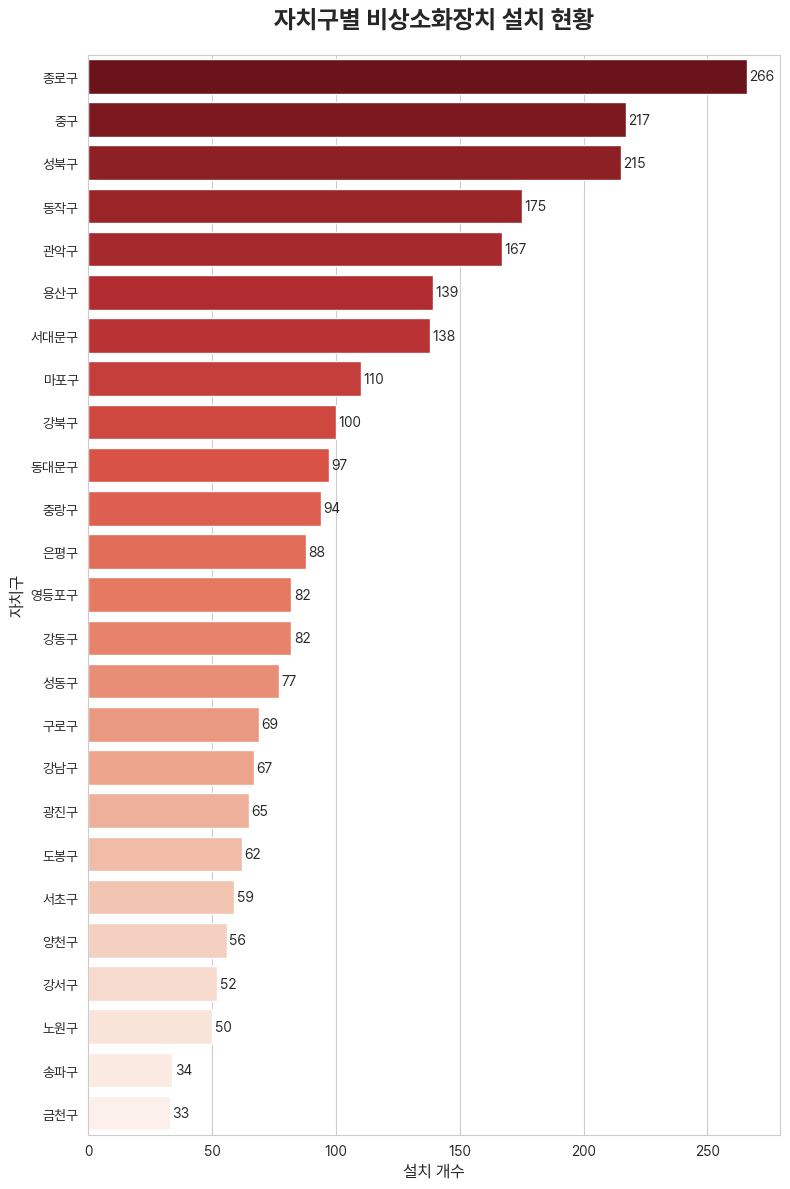

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ---------------------------------------------------------
# 1. 데이터 준비
# ---------------------------------------------------------
df = pd.read_csv('./filtered_data/비상소화장치.csv')

# '구' 이름 추출
df['자치구'] = df['비상소화장치고유번호'].str.split('-').str[0]

# 이름 표준화 함수
def standardize_gu(name):
    if name == '중부':
        return '중구'
    if name.endswith('구'):
        return name
    return name + '구'

df['자치구'] = df['자치구'].apply(standardize_gu)

# 구별 개수 집계
gu_counts = df['자치구'].value_counts().reset_index()
gu_counts.columns = ['자치구', '설치개수']

# 정렬 (설치개수 기준 오름차순 — 가로막대 예쁘게)
gu_counts = gu_counts.sort_values(by='설치개수', ascending=False)


# ---------------------------------------------------------
# 2. 시각화 설정
# ---------------------------------------------------------
sns.set_style("whitegrid")

plt.rcParams['font.family'] = 'Pretendard'   # 한글 폰트
plt.rcParams['axes.unicode_minus'] = False

plt.figure(figsize=(8, 12))   # ★ a 제거


# ---------------------------------------------------------
# 3. 가로 막대그래프
# ---------------------------------------------------------
ax = sns.barplot(
    data=gu_counts,
    y='자치구',      # ★ 가로 막대이므로 y
    x='설치개수',    # ★ 가로 막대이므로 x
    palette='Reds_r'
)

# ---------------------------------------------------------
# 4. 그래프 꾸미기
# ---------------------------------------------------------
plt.title('자치구별 비상소화장치 설치 현황', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('설치 개수', fontsize=12)
plt.ylabel('자치구', fontsize=12)

# 숫자 표시 (막대 오른쪽 끝)
for p in ax.patches:
    width = p.get_width()
    ax.text(
        width + 1,                       # 막대 오른쪽
        p.get_y() + p.get_height()/2,   # 막대 중앙 높이
        f'{int(width)}',
        va='center',
        fontsize=10
    )

plt.tight_layout()
plt.savefig('./results/구별_비상소화시설_가로.png')
plt.show()


In [ ]:
import matplotlib
print(matplotlib.get_cachedir())

C:\Users\User\.matplotlib


In [9]:
gu_counts.to_csv('filtered_data/구별_비상소화장치_개수.csv', encoding = 'utf-8')

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. 데이터 불러오기
# 행정구역 파일은 3번째 줄(header=2)에 컬럼명이 있으므로 이를 기준으로 읽습니다.
df_area = pd.read_csv('data/행정구역(구별)_20251207175910.csv', header=2)
df_device = pd.read_csv('filtered_data/구별_비상소화장치_개수.csv')

# 2. 데이터 전처리
# 필요한 컬럼만 선택 및 이름 변경
df_area_clean = df_area[['자치구별(2)', '면적 (km²)']].copy()
df_area_clean.columns = ['자치구', '면적']
df_area_clean = df_area_clean[df_area_clean['자치구'] != '소계'] # 합계 행 제거

df_device_clean = df_device[['자치구', '설치개수']].copy()

# 3. 데이터 병합 (자치구 기준)
df_merged = pd.merge(df_area_clean, df_device_clean, on='자치구', how='inner')

# 4. 비교 지표 계산: 면적(km²) / 설치개수
# 결과: 비상소화장치 1개당 담당해야 하는 평균 면적
df_merged['1개당_담당면적'] = df_merged['면적'] / df_merged['설치개수']

# 5. 결과 정렬 (담당 면적이 넓은 순서 = 설치 밀도가 낮은 순서)
df_result = df_merged.sort_values(by='1개당_담당면적', ascending=False).reset_index(drop=True)

# 결과 출력
print(df_result[['자치구', '면적', '설치개수', '1개당_담당면적']])

     자치구     면적  설치개수  1개당_담당면적
0    송파구  33.88    34  0.996471
1    강서구  41.45    52  0.797115
2    서초구  46.97    59  0.796102
3    노원구  35.44    50  0.708800
4    강남구  39.51    67  0.589701
5    금천구  13.02    33  0.394545
6    은평구  29.71    88  0.337614
7    도봉구  20.65    62  0.333065
8    양천구  17.41    56  0.310893
9    강동구  24.59    82  0.299878
10  영등포구  24.55    82  0.299390
11   구로구  20.12    69  0.291594
12   광진구  17.06    65  0.262462
13   강북구  23.60   100  0.236000
14   성동구  16.86    77  0.218961
15   마포구  23.85   110  0.216818
16   중랑구  18.50    94  0.196809
17   관악구  29.57   167  0.177066
18   용산구  21.87   139  0.157338
19  동대문구  14.22    97  0.146598
20  서대문구  17.63   138  0.127754
21   성북구  24.57   215  0.114279
22   동작구  16.35   175  0.093429
23   종로구  23.91   266  0.089887
24    중구   9.96   217  0.045899


C:\Users\User\AppData\Local\Temp\ipykernel_30724\200726502.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


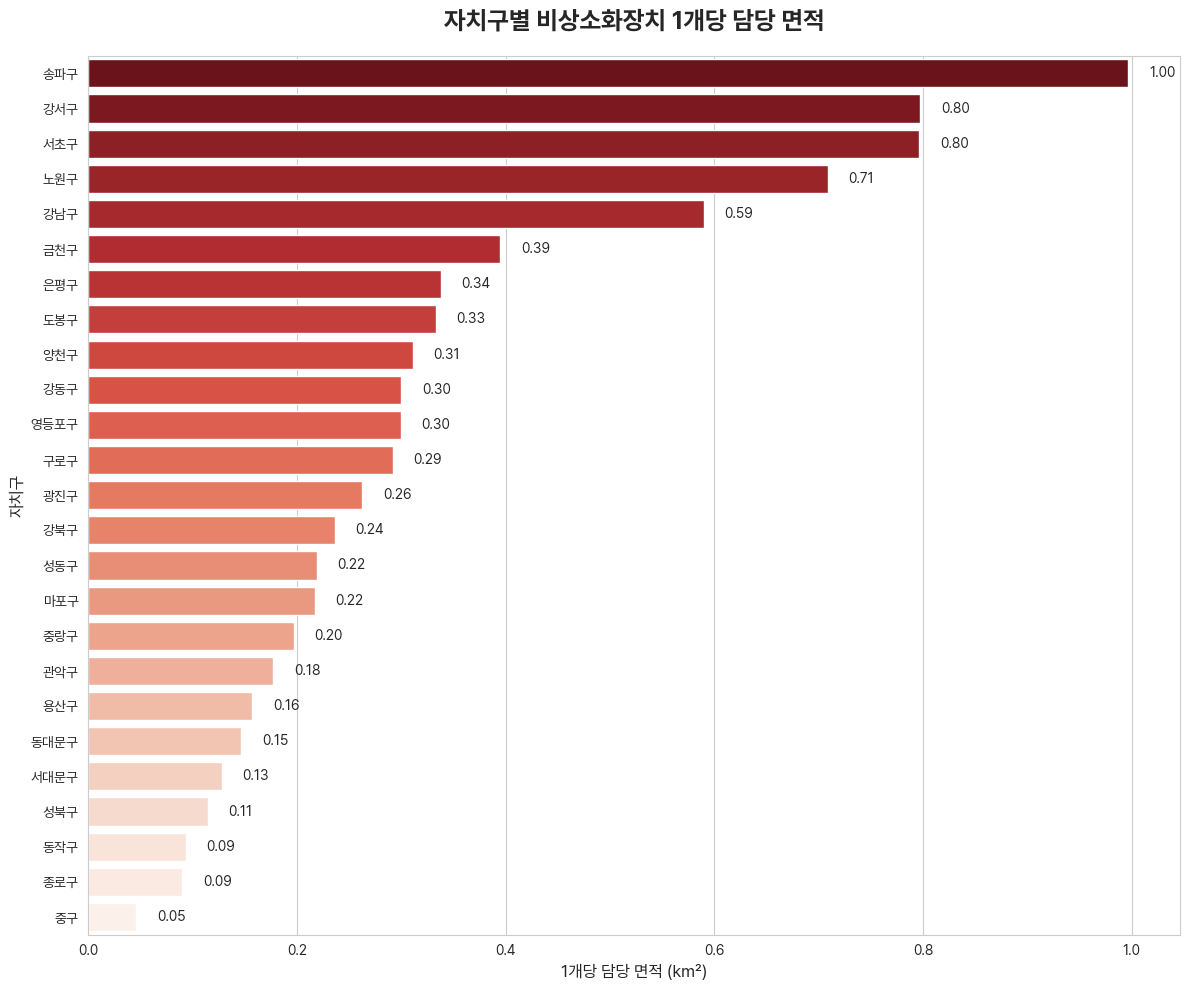

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# ---------------------------------------------------
# 1. 기본 스타일
# ---------------------------------------------------
sns.set_style("whitegrid")

plt.rcParams['font.family'] = 'Pretendard'   # 한글 폰트
plt.rcParams['axes.unicode_minus'] = False

plt.figure(figsize=(12, 10))

# ---------------------------------------------------
# 2. 가로 막대 그래프
# ---------------------------------------------------
ax = sns.barplot(
    data=df_result,
    y='자치구',
    x='1개당_담당면적',
    palette='Reds_r'   # 담당 면적이 클수록 진하게
)

# ---------------------------------------------------
# 3. 제목 및 라벨
# ---------------------------------------------------
plt.title('자치구별 비상소화장치 1개당 담당 면적', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('1개당 담당 면적 (km²)', fontsize=12)
plt.ylabel('자치구', fontsize=12)

# ---------------------------------------------------
# 4. 막대 옆에 수치 표시
# ---------------------------------------------------
for p in ax.patches:
    width = p.get_width()
    ax.text(
        width + 0.02,                            # 막대 오른쪽
        p.get_y() + p.get_height() / 2,          # 막대 가운데
        f'{width:.2f}',                           # 소수점 2자리
        va='center',
        fontsize=10
    )

# ---------------------------------------------------
# 5. 여백/저장
# ---------------------------------------------------
plt.tight_layout()
plt.savefig('./results/자치구별_1개당_담당면적_seaborn.png')
plt.show()
